In [14]:
# importing nessesery libraries

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# import display
import warnings
from statsmodels.graphics.mosaicplot import mosaic
# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
 
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#STEP4 Exploring Data

In [3]:
# importing the dataset

In [5]:
mcdonalds=pd.read_csv("mcdonalds.csv")

In [6]:
print(mcdonalds)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No   

In [7]:
#columns name

In [8]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [9]:
#Number of Rows and Columns:

In [10]:
shape=mcdonalds.shape
shape

(1453, 15)

In [11]:
#size (total no of elements)

In [12]:
size=mcdonalds.size
size

21795

In [13]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [14]:
true_false=mcdonalds.iloc[:,:11].columns
true_false

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [15]:
#converting yes and no to suitable form 0 and 1 through following process and calculating the AVERAGE

In [16]:

# Step 1: Convert 'Yes'/'No' to True/False
logical_matrix = mcdonalds[true_false] == 'Yes'

# Step 2: Convert True/False to 1/0 by adding 0
numeric_matrix = logical_matrix + 0

# Print the result
print("Logical Matrix (True/False):")
# print(logical_matrix)

print("\nNumeric Matrix (1/0):")
print(numeric_matrix)
#step 3: Calculate the average value for each segmentation variable
average_values = numeric_matrix.mean().round(2)

# Print the average values
print("\nAverage Values for Each Segmentation Variable:\n", average_values)
type(average_values)

Logical Matrix (True/False):

Numeric Matrix (1/0):
      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0        

pandas.core.series.Series

In [17]:
#barplots for atributes for each clustur

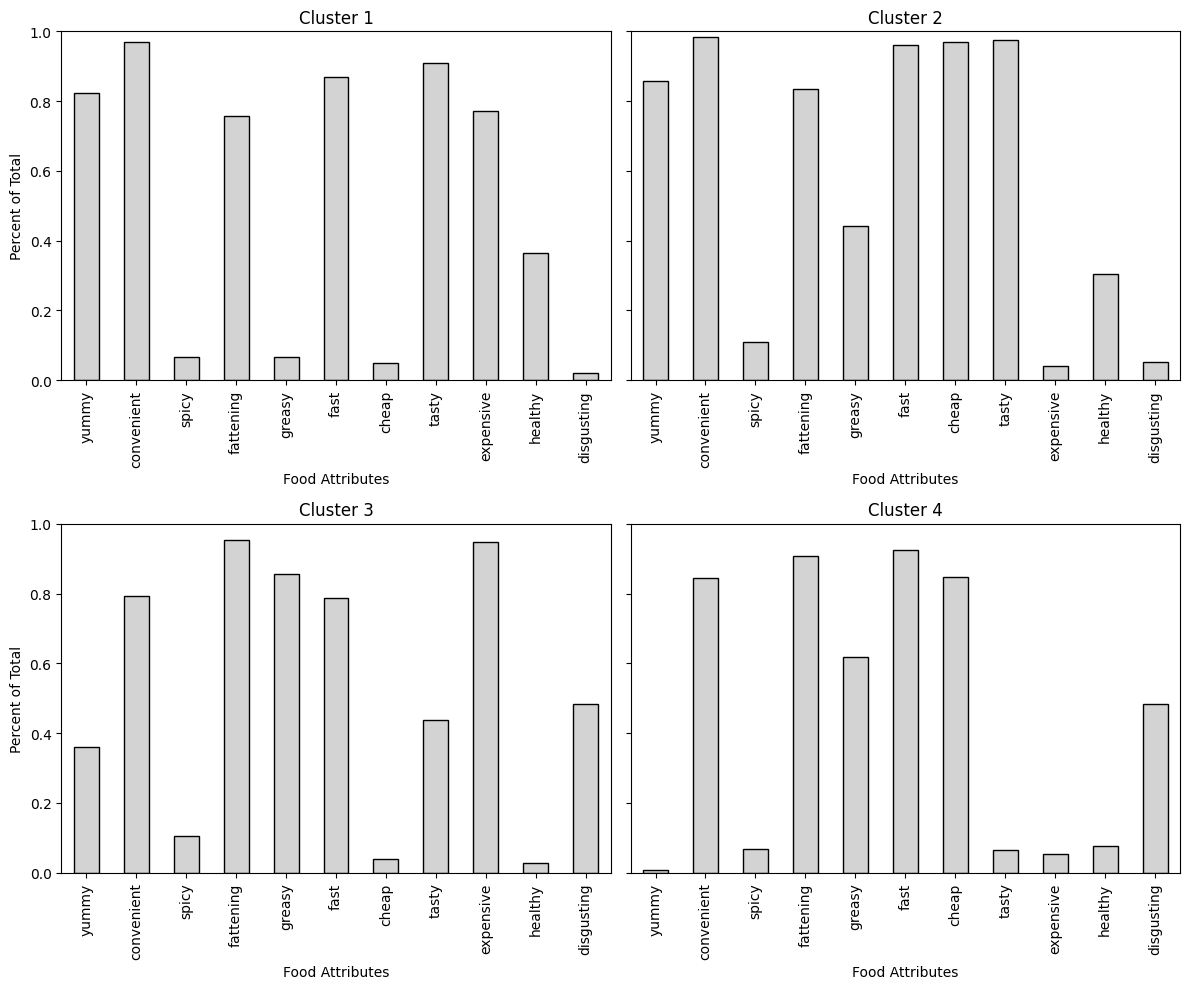

In [18]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
numeric_matrix['cluster'] = kmeans.fit_predict(numeric_matrix)

# Creating subplots for each cluster
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axs = axs.flatten()

# Loop through clusters and create histograms
for cluster_num in range(4):
    cluster_data = numeric_matrix[numeric_matrix['cluster'] == cluster_num]
    
    # Plot histogram for each attribute in this cluster
    cluster_data.drop(columns='cluster').mean().plot(kind='bar', ax=axs[cluster_num], color='lightgray', edgecolor='black')
    
    axs[cluster_num].set_title(f'Cluster {cluster_num + 1}')
    axs[cluster_num].set_ylabel('Percent of Total')
    axs[cluster_num].set_ylim(0, 1)  # Adjust according to your needs
    axs[cluster_num].set_xlabel('Food Attributes')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
binary_df=numeric_matrix

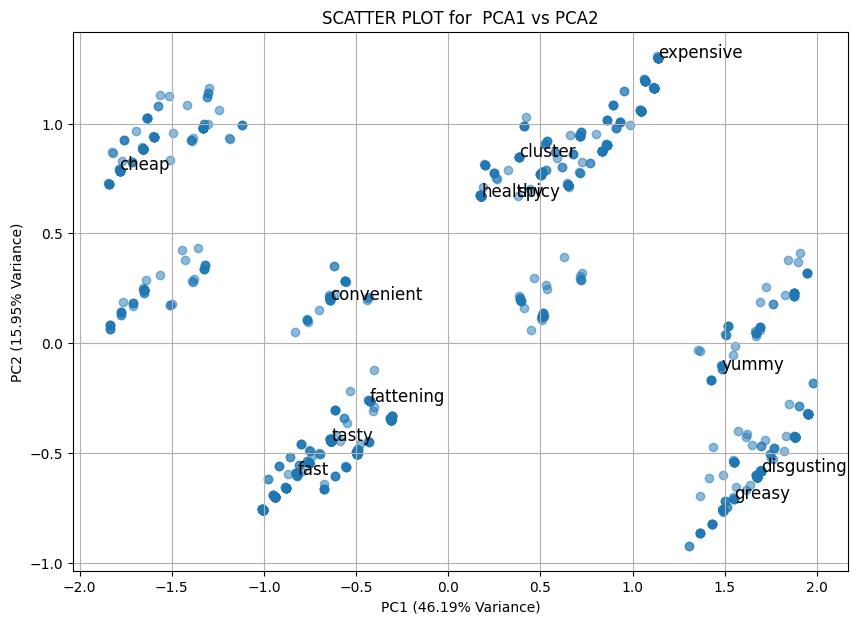

In [21]:
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(binary_df)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
# Step 6: Create a perceptual map (plot)
plt.figure(figsize=(10, 7))

# Scatter plot of the two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

# Annotating the attributes (segmentation variables)
for i in range(len(binary_df.columns)):
    plt.text(pca_result[i % len(binary_df), 0], pca_result[i % len(binary_df), 1], binary_df.columns[i], fontsize=12)

# Set plot title and labels
plt.title('SCATTER PLOT for  PCA1 vs PCA2')
plt.xlabel(f'PC1 ({explained_variance[0] * 100:.2f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1] * 100:.2f}% Variance)')
plt.grid(True)  # Add grid for better visualization
plt.show()  # Display the plot

In [16]:
# Results from principal components analysis

In [17]:
 # Perform PCA
pca = PCA()
pca.fit(binary_df)

# Get standard deviation, proportion of variance, and cumulative proportion
std_dev = pca.singular_values_ / np.sqrt(len(binary_df))
explained_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(explained_variance)

# Preparing data for display in the required format
importance_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_proportion
})

# Create a new DataFrame with PCs as columns
importance_df = importance_df.T
importance_df.columns = [f'PC{i+1}' for i in range(len(std_dev))]

# Display the output in the specified format
# print("Importance of Components:\n")
data_frame=pd.DataFrame(importance_df)
print(data_frame)

                             PC1       PC2       PC3       PC4       PC5  \
Standard Deviation      0.756789  0.607246  0.504446  0.398661  0.337289   
Proportion of Variance  0.299447  0.192797  0.133045  0.083096  0.059481   
Cumulative Proportion   0.299447  0.492244  0.625290  0.708386  0.767866   

                             PC6       PC7       PC8       PC9      PC10  \
Standard Deviation      0.310168  0.289598  0.275027  0.265160  0.248756   
Proportion of Variance  0.050300  0.043849  0.039548  0.036761  0.032353   
Cumulative Proportion   0.818166  0.862015  0.901563  0.938323  0.970677   

                            PC11  
Standard Deviation      0.236821  
Proportion of Variance  0.029323  
Cumulative Proportion   1.000000  


In [18]:
pd.DataFrame(importance_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard Deviation,0.756789,0.607246,0.504446,0.398661,0.337289,0.310168,0.289598,0.275027,0.265160,0.248756,0.236821
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


In [19]:
 # loadings

In [20]:
# Perform PCA
pca = PCA()
pca.fit(binary_df)

# Get standard deviations
std_dev = pca.singular_values_ / np.sqrt(len(binary_df))

# Display standard deviations
print( ', '.join(f"{std:.1f}" for std in std_dev))

0.8, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2


In [21]:
pca = PCA()
pca.fit(binary_df)

# Get the components (loadings)
loadings = pca.components_.T
# Multiply the loadings by -1 to adjust signs
loadings *= -1

# Create a DataFrame for the rotation matrix
rotation_df = pd.DataFrame(loadings, index=binary_df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the rotation matrix
print("Rotation (n x k) = (11 x 11):\n")
print(rotation_df)
rotation=rotation_df

Rotation (n x k) = (11 x 11):

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444 -0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515  0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019 -0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359  0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373 -0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642  0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310 -0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265  0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397 -0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051 -0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571 -0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy       0.280

In [22]:
labels=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

In [23]:
df = pd.DataFrame(rotation, index=labels)
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


In [24]:
# perceptual map for the PCA analysis 

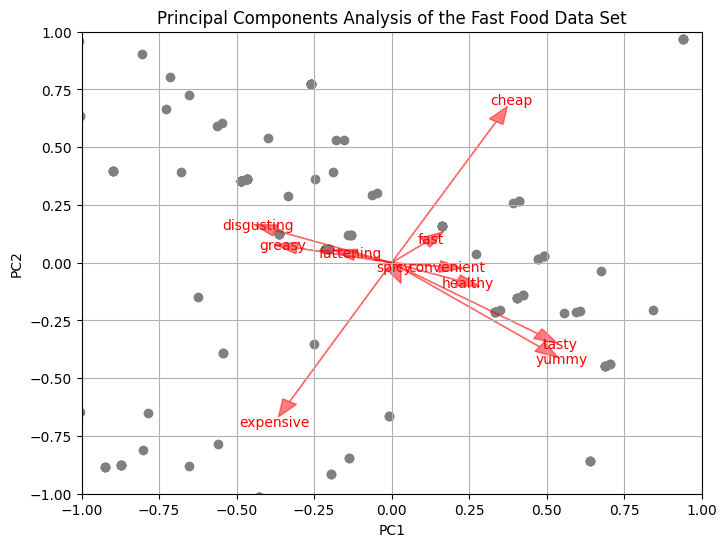

In [566]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_matrix)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_scores = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA scores
pca_scores_df = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])
# Get the loadings (arrows for original features) and scale them up
scaling_factor = 3  # Adjust this value to make arrows larger
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) * scaling_factor
# Plot the consumers (as grey points)
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores_df['PC1'], pca_scores_df['PC2'], color='grey', label='Consumers')
arrow_scale = 2
# Add labels for the arrows
for i in range(df.shape[0]):
    plt.arrow(0, 0, df['PC1'][i] , df['PC2'][i], color='red', alpha=0.5, head_width=0.05)
    plt.text(df['PC1'][i]*1.15, df['PC2'][i]*1.15, labels[i], color='red', ha='center', va='center')

# Labeling the axes
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-1,1)  # Fixes x-axis scale from 0 to 6
plt.ylim(-1, 1)  # Fixes y-axis scale from 0 to 50

# Title
plt.title('Principal Components Analysis of the Fast Food Data Set')

# Show plot
plt.grid()
plt.show()

In [14]:
# Step5:ExtractingSegments

In [15]:
# A.5.1 Usingk-Means

In [534]:
# Perform K-Means Clustering for Different Numbers of Segments

In [22]:
# Assuming `data` is your DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_matrix) # Standardizing the data
numeric_matrix

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,1


In [25]:
 # Plot for determining  Number of Market Segments

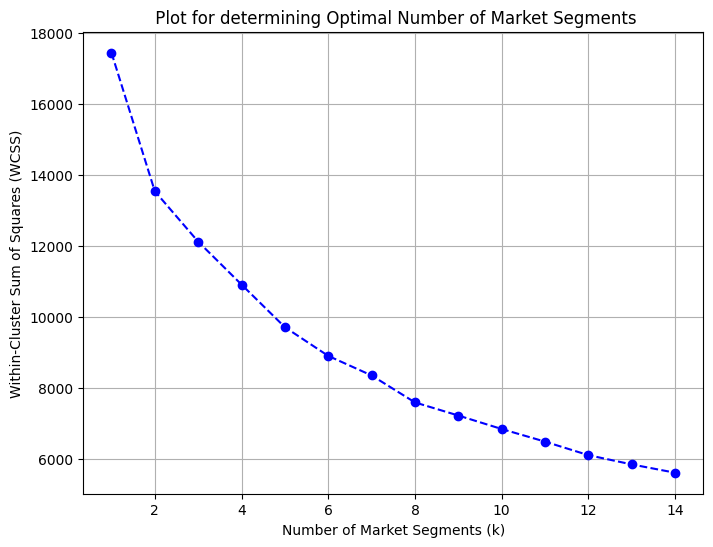

In [24]:
wcss = []  # List to store the within-cluster sum of squares (WCSS) for each solution

for k in range(1, 15):  # Loop through 2 to 8 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # 10 random restarts
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for k-means
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--', color='b')
plt.title(' Plot for determining  Number of Market Segments')
plt.xlabel('Number of Market Segments (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

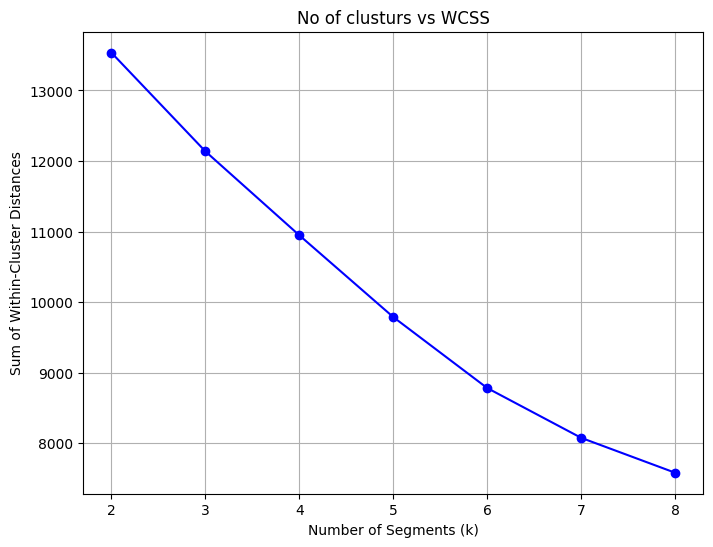

Cluster labels for k=4: [1 2 2 ... 2 0 1]


In [27]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_matrix)

# Step 2: Perform k-means clustering for k=2 to 8, and store the sum of within-cluster distances (inertia)
sum_of_distances = []
k_range = range(2, 9)
models = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(scaled_data)
    sum_of_distances.append(kmeans.inertia_)  # Inertia is the sum of within-cluster distances
    models[k] = kmeans

# Step 3: Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sum_of_distances, marker='o', color='b')
plt.title('No of clusturs vs WCSS')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of Within-Cluster Distances')
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Step 4: (Optional) View cluster labels for one of the k values, say k=4
cluster_labels = models[4].labels_
print(f"Cluster labels for k=4: {cluster_labels}")

In [538]:
# bar plot of the sum of within-cluster distances for different numbers of segments(Scree Plot)

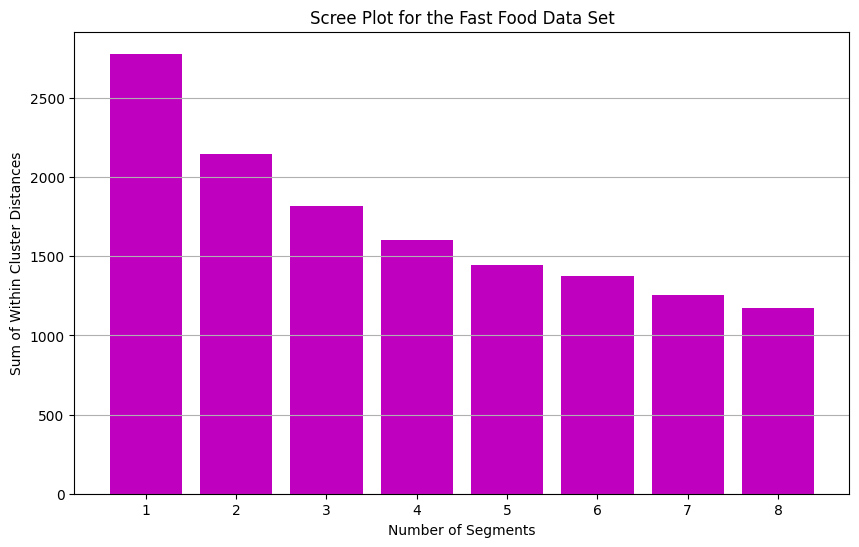

In [539]:

# Store the sum of distances (inertia) for each k
inertia = []

# Perform K-means clustering for k from 1 to 8
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(numeric_matrix)
    inertia.append(kmeans.inertia_)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 9), inertia, color='m')
plt.title('Scree Plot for the Fast Food Data Set')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.xticks(range(1, 9))
plt.grid(axis='y')
plt.show()

In [540]:
# create a boxplot that shows the distribution of global stability

In [29]:
 scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_matrix)

# Set the number of clusters you want to create
n_clusters = 7  # You can change this to any number between 2 and 8 based on your analysis

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Convert labels to DataFrame for better readability
labels_df = pd.DataFrame(labels, columns=['Cluster Label'])

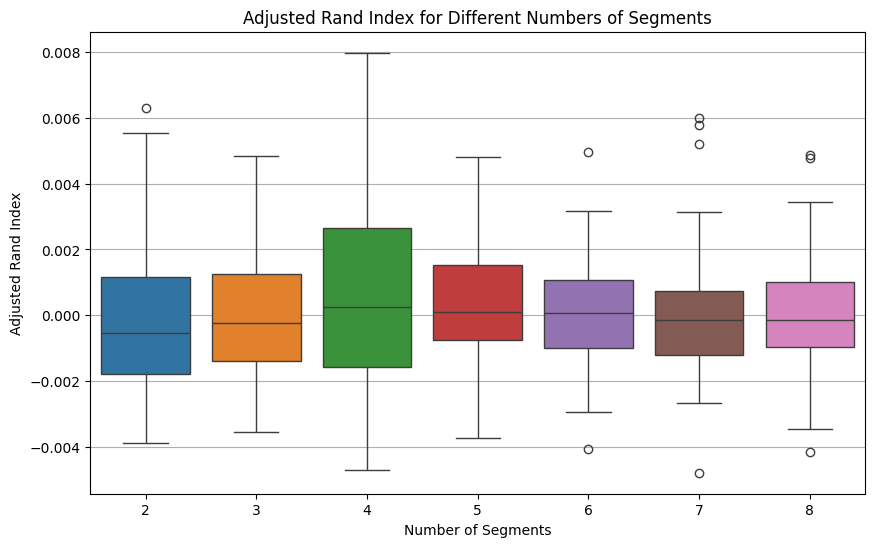

In [80]:
# Assuming true_labels are available in MD_x for ARI calculation
true_labels = labels  # Replace with your true labels column

# Parameters
n_clusters_range = range(2, 9)  # Number of clusters (2 to 8)
n_init = 10  # Number of random initializations for K-means
n_boot = 100  # Number of bootstrap samples

# To store the ARI results
ari_results = {k: [] for k in n_clusters_range}

# Bootstrap sampling and K-means clustering
for k in n_clusters_range:
    for _ in range(n_boot):
        # Bootstrap sample
        sample = resample(numeric_matrix)
        
        # Fit K-Means
        kmeans = KMeans(n_clusters=k, n_init=n_init)
        kmeans.fit(sample)
        predicted_labels = kmeans.labels_
        
        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(true_labels, predicted_labels)
        ari_results[k].append(ari)

# Convert ARI results to DataFrame for easy handling
ari_df = pd.DataFrame(ari_results)

# Plotting boxplots for ARI
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_df)
plt.title('Adjusted Rand Index for Different Numbers of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.xticks(ticks=np.arange(len(n_clusters_range)), labels=n_clusters_range)
plt.grid(axis='y')
plt.show()

In [30]:
# One-hot encode the categorical columns
segments= pd.get_dummies(labels_df,columns=['Cluster Label'], drop_first=True)


In [31]:
new_data=pd.concat([numeric_matrix, labels_df], axis=1)

In [35]:
# BAR PLOT

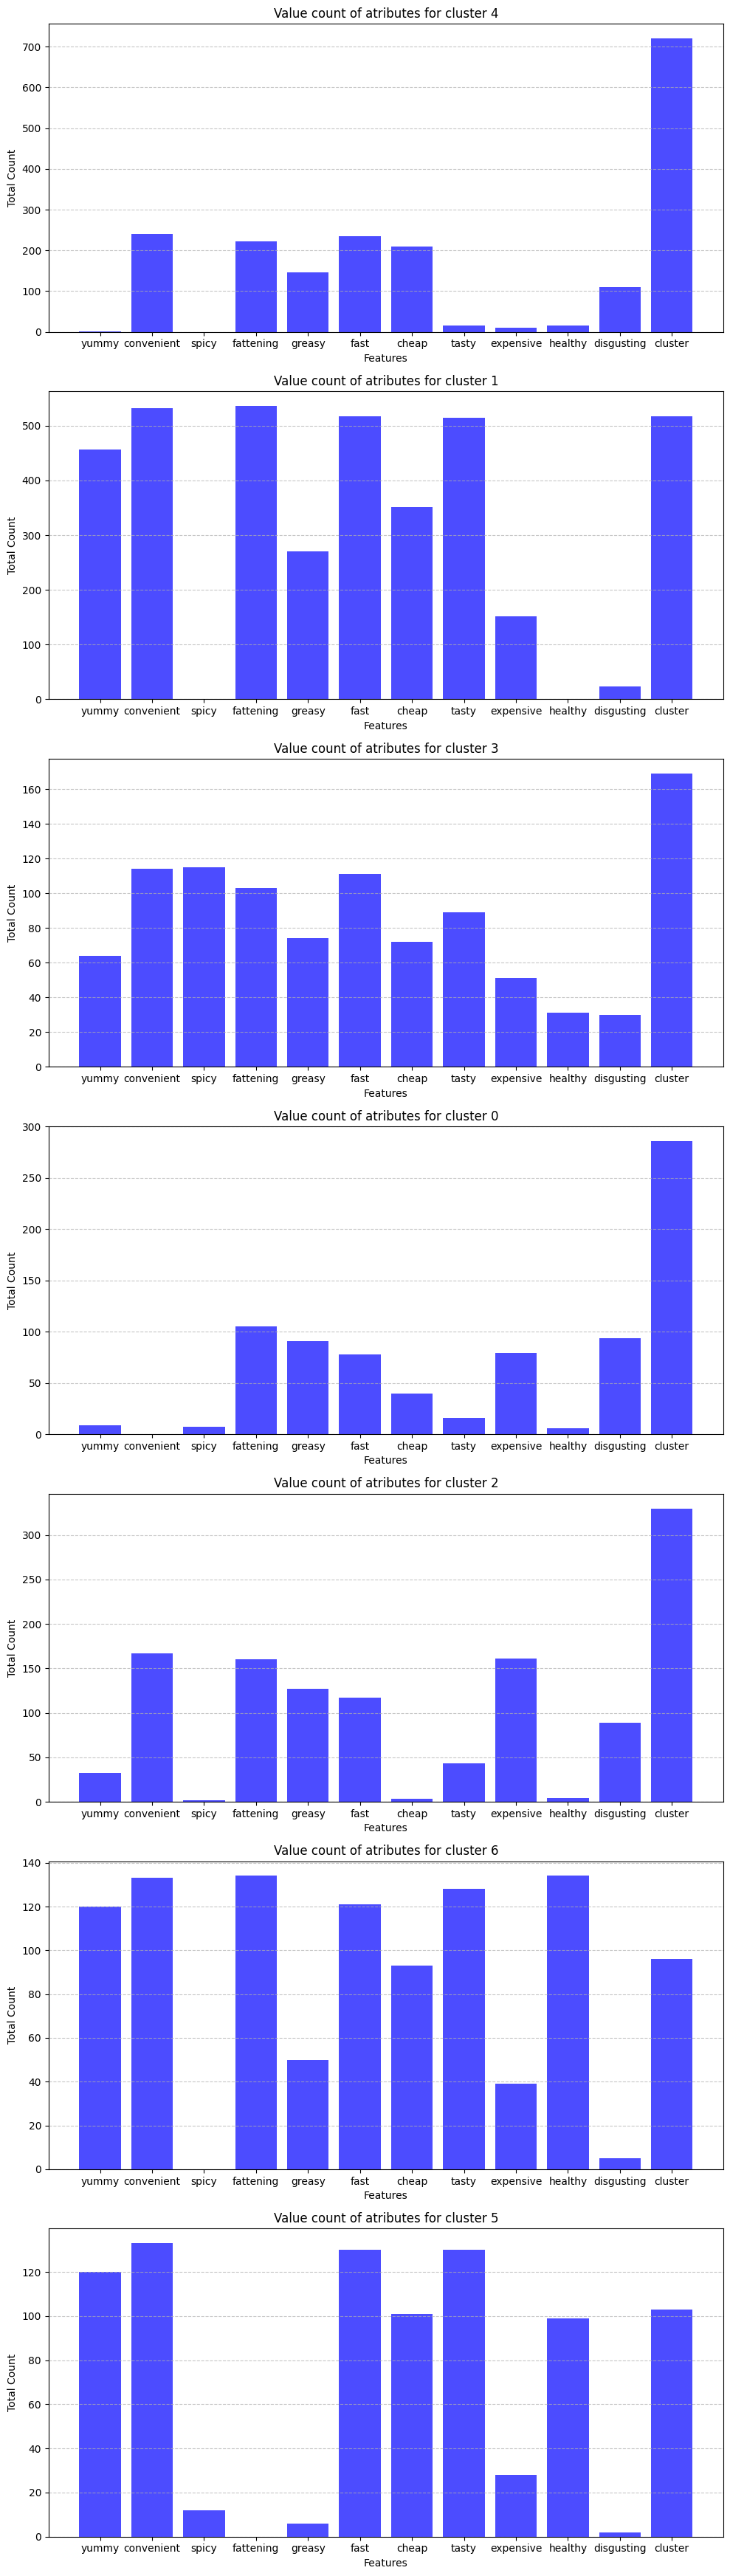

In [34]:
# List of clusters to plot (you can change this as needed)
clusters = new_data['Cluster Label'].unique()
df=new_data
# Create a figure for subplots
fig, axs = plt.subplots(len(clusters), figsize=(10, 5 * len(clusters)))

# Loop through each cluster and plot histograms for features
for i, cluster in enumerate(clusters):
    cluster_data = df[df['Cluster Label'] == cluster]
    
    # Plotting histograms for each feature in the cluster
    axs[i].bar(cluster_data.columns[:-1], cluster_data.sum(axis=0)[:-1], color='blue', alpha=0.7)
    axs[i].set_title(f'Value count of atributes for cluster {cluster}')
    axs[i].set_xlabel('Features')
    axs[i].set_ylabel('Total Count')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [122]:
# Segment level stability with in solutions (SLSW) plot

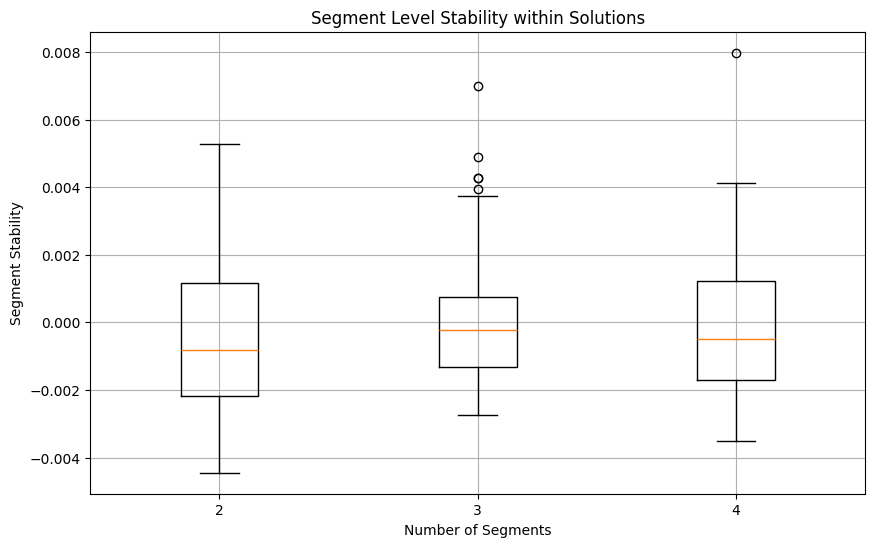

In [121]:
data=numeric_matrix
# Parameters
n_clusters_range = range(2,6) 
n_boot = 100  # Number of bootstrap samples
n_init = 10  # Number of random initializations for k-means

# Store stability scores for each number of clusters
stability_scores = []

# For each number of clusters
for n_clusters in n_clusters_range:
    cluster_stabilities = []
    
    # Run k-means on original data to get the original labels
    kmeans_original = KMeans(n_clusters=n_clusters, n_init=n_init)
    labels_original = kmeans_original.fit_predict(data)  # Use your dataset here
    
    # Perform bootstrapping
    for _ in range(n_boot):
        # Create a bootstrap sample
        data_bootstrap = resample(data)
        
        # Apply k-means to the bootstrap sample
        kmeans_boot = KMeans(n_clusters=n_clusters, n_init=n_init)
        labels_boot = kmeans_boot.fit_predict(data_bootstrap)
        
        # Calculate the stability for this segment (using ARI for simplicity)
        stability = adjusted_rand_score(labels_original, labels_boot)
        cluster_stabilities.append(stability)
    
    # Append the median stability for the current number of clusters
    stability_scores.append(cluster_stabilities)

# Plot Segment Stability Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(stability_scores, positions=list(n_clusters_range))
plt.title('Segment Level Stability within Solutions')
plt.xlabel('Number of Segments')
plt.ylabel('Segment Stability')
plt.grid(True)
plt.show()

In [17]:
 #  A.5.2 Using Mixtures of Distributions

In [542]:
data=numeric_matrix
MD_x=data

In [551]:

def calculate_icl(gmm, data):
    log_likelihood = gmm.score(data) * len(data)  # Total log-likelihood
    n_clusters = gmm.n_components  # Number of clusters
    n_params = gmm.n_components * (gmm.means_.shape[1] + gmm.covariances_.shape[1])  # Number of parameters
    penalty = n_params * np.log(len(data))  # Penalty for complexity
    icl = log_likelihood - penalty  # Calculate ICL
    return log_likelihood, icl

def fit_gmm_and_calculate_criteria(data, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=1234, n_init=10)
    gmm.fit(data)
    
    log_likelihood, icl = calculate_icl(gmm, data)
    
    aic = gmm.aic(data)  # AIC calculation
    bic = gmm.bic(data)  # BIC calculation
    
    return log_likelihood, aic, bic, icl

 

results = []

# Loop through the desired number of clusters
for n_clusters in range(2, 9):  # 2 to 8 clusters
    log_likelihood, aic, bic, icl = fit_gmm_and_calculate_criteria(MD_x, n_clusters)
    
    # Simulating values for iter, converged, and k0
    iter_count = 1  # You can change this to simulate different iterations
    converged = True  # This would depend on whether the algorithm converged
    k0 = n_clusters  # This can also be adjusted as needed
    
    results.append((iter_count, converged, n_clusters, k0, log_likelihood, aic, bic, icl))

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results, columns=["iter", "converged", "k", "k0", "logLik", "AIC", "BIC", "ICL"])

# Format logLik to be negative and large
results_df['logLik'] = results_df['logLik'].apply(lambda x: -abs(x))
results_df['AIC'] = results_df['AIC'].apply(lambda x: (x))
results_df['BIC'] = results_df['BIC'].apply(lambda x: (x))
results_df['ICL'] = results_df['ICL'].apply(lambda x: (x))

# Print the results DataFrame
print(results_df)

   iter  converged  k  k0        logLik           AIC           BIC  \
0     1       True  2   2 -11147.820925 -21985.641850 -21167.027072   
1     1       True  3   3 -14126.449712 -27786.899425 -26556.336565   
2     1       True  4   4 -17513.541902 -34405.083804 -32762.572863   
3     1       True  5   5 -22500.931691 -44223.863382 -42169.404358   
4     1       True  6   6 -28522.042011 -56110.084021 -53643.676917   
5     1       True  7   7 -29652.476457 -58214.952914 -55336.597727   
6     1       True  8   8 -26714.810184 -52183.620368 -48893.317099   

            ICL  
0  10827.439956  
1  13645.878259  
2  16872.779964  
3  21699.979268  
4  27560.899103  
5  28531.143065  
6  25433.286307  


In [552]:
#PLOT THE INFORMATION CRITERIA

In [553]:
results_df['n_clusters']=results_df['k']

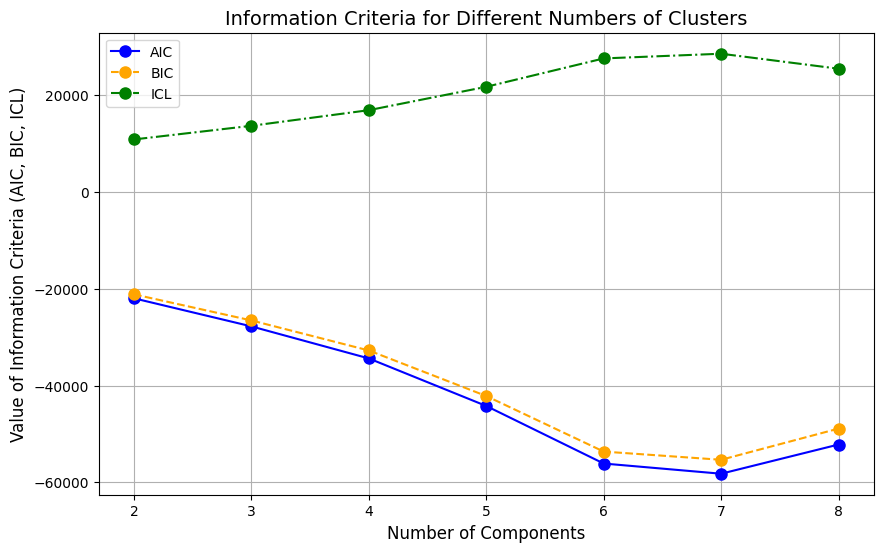

In [554]:
# Plot the information criteria
plt.figure(figsize=(10, 6))

# Customizing plot markers and colors
plt.plot(results_df['n_clusters'], results_df['AIC'], marker='o', label='AIC', linestyle='-', color='blue', markersize=8)
plt.plot(results_df['n_clusters'], results_df['BIC'], marker='o', label='BIC', linestyle='--', color='orange', markersize=8)
plt.plot(results_df['n_clusters'], results_df['ICL'], marker='o', label='ICL', linestyle='-.', color='green', markersize=8)

# Customize the plot
plt.title('Information Criteria for Different Numbers of Clusters', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)', fontsize=12)
plt.xticks(results_df['n_clusters'])
plt.legend()
plt.grid()
# Show plot
plt.show()

In [577]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [578]:
#  This  shows how similar the two clustering results are.

In [18]:
# how the mixture model behaves when NOT initialized with the KMeans clustering results.

In [585]:
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, n_init=10)
gmm.fit(MD_x)

# Assign clusters to the data
clusters_gmm = gmm.predict(MD_x)

# Simulating kmeans clustering for comparison (you might already have kmeans clusters)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(MD_x)
clusters_kmeans = kmeans.labels_

# Create a DataFrame to compare clusters
comparison_df = pd.DataFrame({
    'kmeans': clusters_kmeans,
    'mixture': clusters_gmm
})

# Generate the contingency table
contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'], rownames=['KMeans'], colnames=['Mixture'])

# Display the contingency table
contingency_table

Mixture,0,1,2,3
KMeans,,,,
0,6,132,0,180
1,2,17,438,46
2,227,60,192,11
3,3,135,0,4


In [87]:
# how the mixture model behaves when initialized with the KMeans clustering results.

In [587]:
n_clusters = 4

# Step 1: Perform KMeans clustering to get centroids and other parameters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(MD_x)

# KMeans initialization values
means_init = kmeans.cluster_centers_
labels = kmeans.labels_

# Step 2: Initialize the GaussianMixture model with KMeans centroids
Gmm = GaussianMixture(n_components=n_clusters, 
                      covariance_type='full', 
                      means_init=means_init, 
                      random_state=42)

# Fit the GMM model to the data
Gmm.fit(MD_x)
gmm_labels = Gmm.predict(MD_x)

# Step 3: Create a contingency table
contingency_table = pd.crosstab(index=kmeans_labels, columns=gmm_labels, rownames=['KMeans'], colnames=['GMM'])
contingency_table

GMM,0,1,2,3
KMeans,,,,
0,51,517,12,0
1,11,3,23,191
2,21,44,14,243
3,263,30,30,0


In [596]:
# The log-likelihoodvalues for the two fitted mixture models

In [600]:
# log-likelihoodvalue for mixture model
log_likelihoods_gmm = gmm.score_samples(MD_x)
log_likelihoods_gmm
#  Calculate the total log-likelihood by summing over all samples
total_log_likelihood = np.sum(log_likelihoods_gmm)
total_log_likelihood
print(f" log-likelihood for GMM: {total_log_likelihood:.3f}")
# log-likelihoodvalue for mixture model with initialized with the KMeans clustering results
log_likelihoods_gmm_Kmeans_init = Gmm.score_samples(MD_x)
#  Calculate the total log-likelihood by summing over all samples
total_log_likelihood_init = np.sum(log_likelihoods_gmm)
total_log_likelihood_init
print(f" log-likelihood for GMM with initialisation: {total_log_likelihood_init:.3f}")

 log-likelihood for GMM: 18329.023
 log-likelihood for GMM with initialisation: 18329.023


In [601]:
#both are equal

In [24]:
# A.5.3  using mixtures of regression model

In [619]:
#calculating value count for like column

In [610]:

# Get the frequency table
like_table = mcdonalds['Like'].value_counts().sort_index(ascending=False)

# Display the table in reverse order
print(like_table)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [32]:
mcdonalds['Like'].values

array(['-3', '+2', '+1', ..., '+3', '+4', '-3'], dtype=object)

In [33]:
# calculating value counts for filtered like column

In [90]:
# Function to extract numeric values
def extract_numeric(sentiment):
    # Use regex to find numbers with optional '+' or '-' sign
    match = re.search(r'[+-]?\d+', sentiment)
    if match:
        return match.group(0)
    return None

# Apply the function to the DataFrame column
mcdonalds['Like.n'] = mcdonalds['Like'].apply(extract_numeric)

# Display the cleaned DataFrame
mcdonalds['Like.n'].value_counts().sort_index(ascending=False)

Like.n
0     169
-5    152
-4     71
-3     73
-2     59
-1     58
+5    143
+4    160
+3    229
+2    187
+1    152
Name: count, dtype: int64

In [36]:
 import string
c=[]
# Get lowercase alphabet
lowercase = string.ascii_lowercase
# Get uppercase alphabet
uppercase = string.ascii_uppercase
import string
# Special characters from string.punctuation
special_characters = string.punctuation
for i in  mcdonalds['Like']:
    for j in i:
        if j not in lowercase and j not in uppercase and j not in special_characters and j!=' ':
            c.append(int(j))


In [604]:
mc_donalds = pd.DataFrame(c, columns=['like'])

In [608]:
mc_donalds.value_counts().sort_index(ascending=False)

like
5       295
4       231
3       302
2       246
1       210
0       169
Name: count, dtype: int64

In [38]:

# Create 'Like.n' by converting the 'Like' variable using the transformation (6 - Like)
mcdonalds['Like.n'] = 6 - mc_donalds['like']

# Display the frequency table for 'Like.n'
like_n_table = mcdonalds['Like.n'].value_counts().sort_index()

# Output the frequency table
like_n_table

Like.n
1    295
2    231
3    302
4    246
5    210
6    169
Name: count, dtype: int64

In [59]:
import pandas as pd
import patsy
# Step 1: Concatenate the first 11 variable names
f = " + ".join(numeric_matrix.columns[:]) 

# Step 2: Create the formula string
formula_str = f"Like.n ~ {f}"


print(formula_str)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [499]:
# finite mixture of linear regression models

In [85]:
gmm = GaussianMixture(n_components=2, n_init=20,max_iter=100,tol=1e-6)
gmm.fit(X_scaled)

labels = gmm.predict(X_scaled)

# Adjust labels to be 1 and 2 instead of 0 and 1
labels += 1

# Append the labels to the original DataFrame
mcdonalds['Cluster'] = labels

# Summarize the cluster sizes
cluster_sizes = mcdonalds['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)
 # Convergence information
iterations = gmm.n_iter_
print(f"Convergence after {iterations} iterations")


Cluster sizes:
Cluster
1    468
2    985
Name: count, dtype: int64
Convergence after 13 iterations


In [87]:
# We assess the significance of the parameters of each regression model as

In [68]:
mcdonald=pd.concat([numeric_matrix,mcdonalds['Like.n'] ], axis=1)

In [620]:
#reuired significance of the parameters of each regression model as

In [28]:
NewData=mcdonalds[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]

In [42]:
df=pd.concat([NewData,mcdonalds['Like.n']],axis=1)

In [159]:
#prepare the data

In [53]:
# One-hot encode the categorical variables
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(df).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_df.columns = [col.replace('_Yes', 'Yes') for col in encoded_df.columns]
encoded_df['Like']=mcdonalds['Like.n']  
# encoded_df

In [46]:
# Fit a Gaussian Mixture Model to create the clusters (2 components)
gmm = GaussianMixture(n_components=2)
encoded_df['cluster'] = gmm.fit_predict(encoded_df)

# Split data by clusters for component-wise regression
component_1 = encoded_df[encoded_df['cluster'] == 0]
component_2 = encoded_df[encoded_df['cluster'] == 1]
 

In [191]:
# Define the target variable and the predictors
target = 'Like'
predictors = encoded_df.columns.drop(['cluster'])

# Component 1: Linear regression
X_comp1 = sm.add_constant(component_1[predictors])
y_comp1 = component_1[target]
model_comp1 = sm.OLS(y_comp1, X_comp1).fit()

# Component 2: Linear regression
X_comp2 = sm.add_constant(component_2[predictors])
y_comp2 = component_2[target]
model_comp2 = sm.OLS(y_comp2, X_comp2).fit()

# Display summaries for both models
print("Component 1  Summary:")
print(model_comp1.summary())

print("\nComponent 2  Summary:")
print(model_comp2.summary())

Component 1  Summary:
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.084e+31
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:45:13   Log-Likelihood:                 30724.
No. Observations:                 946   AIC:                        -6.143e+04
Df Residuals:                     935   BIC:                        -6.137e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.232e-15

In [57]:
df=encoded_df[['yummyYes','convenientYes','spicyYes','fatteningYes','greasyYes','fastYes','cheapYes','tastyYes','expensiveYes','healthyYes','disgustingYes']]

In [9]:
#dendogram

In [5]:
 scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_matrix)

# Set the number of clusters you want to create
n_clusters = 7  # You can change this to any number between 2 and 8 based on your analysis

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Convert labels to DataFrame for better readability
labels_df = pd.DataFrame(labels, columns=['Cluster Label'])
# One-hot encode the categorical columns
labels_dfsegments= pd.get_dummies(labels_df,columns=['Cluster Label'], drop_first=True)
labels_dfsegments

In [215]:
# Step 2: Convert True/False to 1/0 by adding 0
segment_ = labels_dfsegments + 0
segment_

,Cluster Label_1,Cluster Label_2,Cluster Label_3,Cluster Label_4,Cluster Label_5,Cluster Label_6
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1448,0,0,0,1,0,0
1449,0,0,0,0,0,0
1450,0,0,1,0,0,0
1451,0,0,0,0,1,0


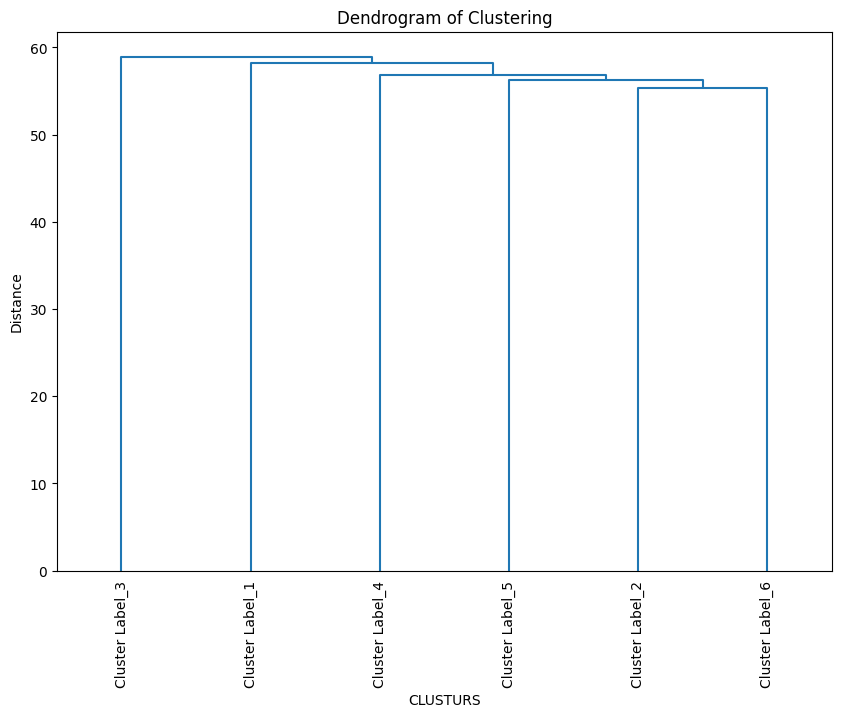

In [217]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(segment_)
# Perform hierarchical clustering
Z = linkage(df_scaled.T, method='ward')  # Using 'ward' linkage for hierarchical clustering

# Create a dendrogram to visualize the clustering of features
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=segment_.columns)
plt.title("Dendrogram of Clustering")
plt.xlabel("CLUSTURS")
plt.ylabel("Distance")
# Rotate x-axis labels and adjust font size
plt.xticks(rotation=90, fontsize=10)

plt.show()



In [19]:
# ADDITIONAL ADDED

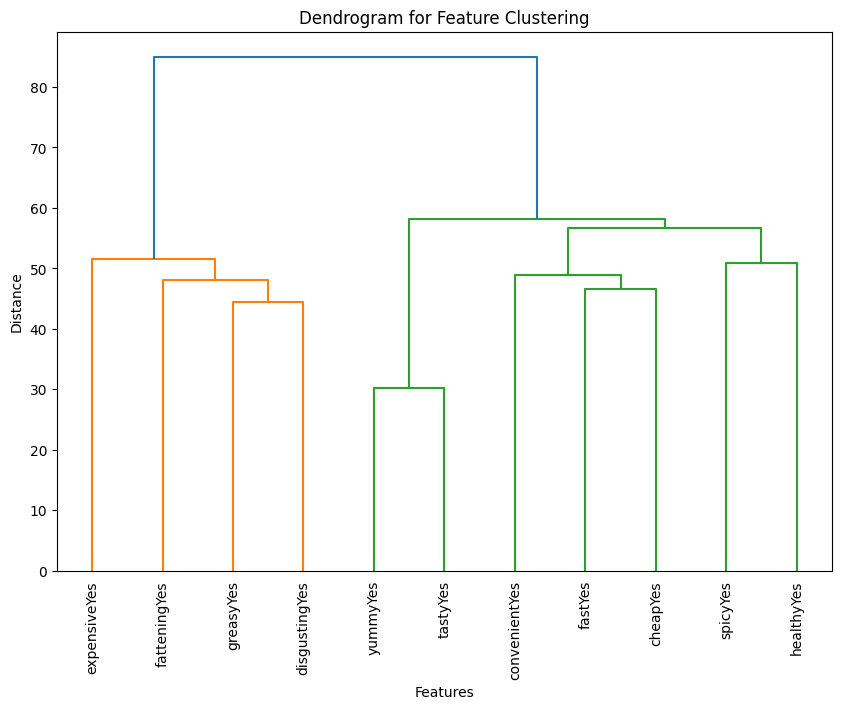

In [59]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Perform hierarchical clustering
Z = linkage(df_scaled.T, method='ward')  # Using 'ward' linkage for hierarchical clustering

# Create a dendrogram to visualize the clustering of features
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.columns)
plt.title("Dendrogram for Feature Clustering")
plt.xlabel("Features")
plt.ylabel("Distance")
# Rotate x-axis labels and adjust font size
plt.xticks(rotation=90, fontsize=10)

plt.show()

 

In [20]:
#  A.6 Step 6: Profiling Segments

In [274]:
 # Segment profile plot for the four-segment solution

In [275]:
# Features to plot
features =numeric_matrix.columns
# Step 1: Standardize the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_matrix)

# Step 2: Perform KMeans clustering for 4 segments
kmeans = KMeans(n_clusters=5)
numeric_matrix['cluster'] = kmeans.fit_predict(df_scaled)

In [276]:
data=numeric_matrix

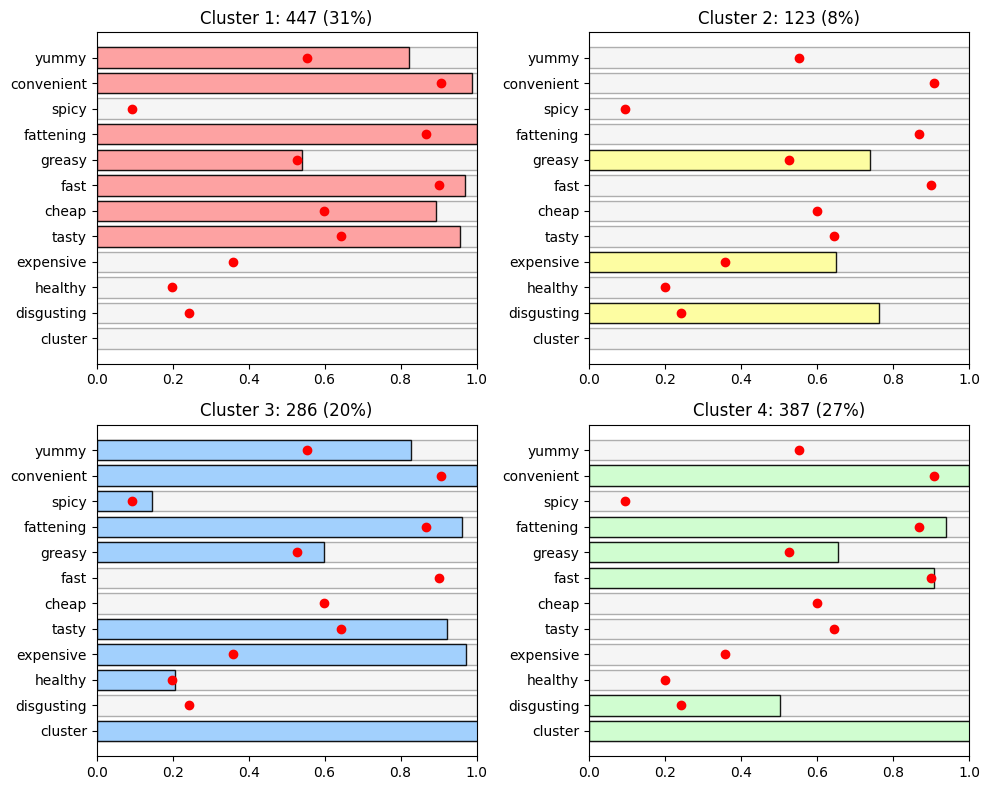

In [265]:
# Step 1: Calculate means and ANOVA p-values for each feature
marker_vars = []
cluster_means = {}

for feature in features:
    # Calculate the means for each cluster
    means = data.groupby('cluster')[feature].mean()
    cluster_means[feature] = means

    # Conduct ANOVA
    f_value, p_value = stats.f_oneway(
        *[data[data['cluster'] == cluster][feature] for cluster in data['cluster'].unique()]
    )
    
    if p_value < 0.05:  # Significant marker variable
        marker_vars.append(feature)

# Step 2: Identify marker variables for each cluster based on means
cluster_marker_vars = {cluster: [] for cluster in data['cluster'].unique()}

for feature in marker_vars:
    for cluster in data['cluster'].unique():
        # If this feature has a significantly higher mean for this cluster, add it
        mean_value = cluster_means[feature][cluster]
        if mean_value > data[feature].mean():  # Compare to overall mean for significance
            cluster_marker_vars[cluster].append(feature)

# Step 3: Plotting
colors = ['#FF9999', '#FFFF99', '#99CCFF', '#CCFFCC']
clusters = ['Cluster 1: {} ({}%)'.format(len(data[data['cluster'] == 1]), round(len(data[data['cluster'] == 1]) / len(data) * 100)),
            'Cluster 2: {} ({}%)'.format(len(data[data['cluster'] == 2]), round(len(data[data['cluster'] == 2]) / len(data) * 100)),
            'Cluster 3: {} ({}%)'.format(len(data[data['cluster'] == 3]), round(len(data[data['cluster'] == 3]) / len(data) * 100)),
            'Cluster 4: {} ({}%)'.format(len(data[data['cluster'] == 4]), round(len(data[data['cluster'] == 4]) / len(data) * 100))]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    cluster = i + 1
    # Set a baseline for all bars (greyed out for non-marker variables)
    ax.barh(features, 1, color='#E0E0E0', edgecolor='black', alpha=0.3)  # Unshaded (for entire sample)
    
    # Color the marker variables
    marker_means = data.groupby('cluster')[cluster_marker_vars[cluster]].mean().loc[cluster]
    ax.barh(cluster_marker_vars[cluster], marker_means, color=colors[i], edgecolor='black', alpha=0.9)  # Shaded marker vars

    # Adding dots and horizontal lines (representing percentage of respondents)
    overall_means = data[features].mean()
    ax.errorbar(overall_means, np.arange(len(features)), fmt='o', color='red', capsize=3)
    
    # Title and formatting
    ax.set_title(clusters[i], fontsize=12)
    ax.set_xlim(0, 1)
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [21]:
# Segment separation plot using principal components 1 and 2

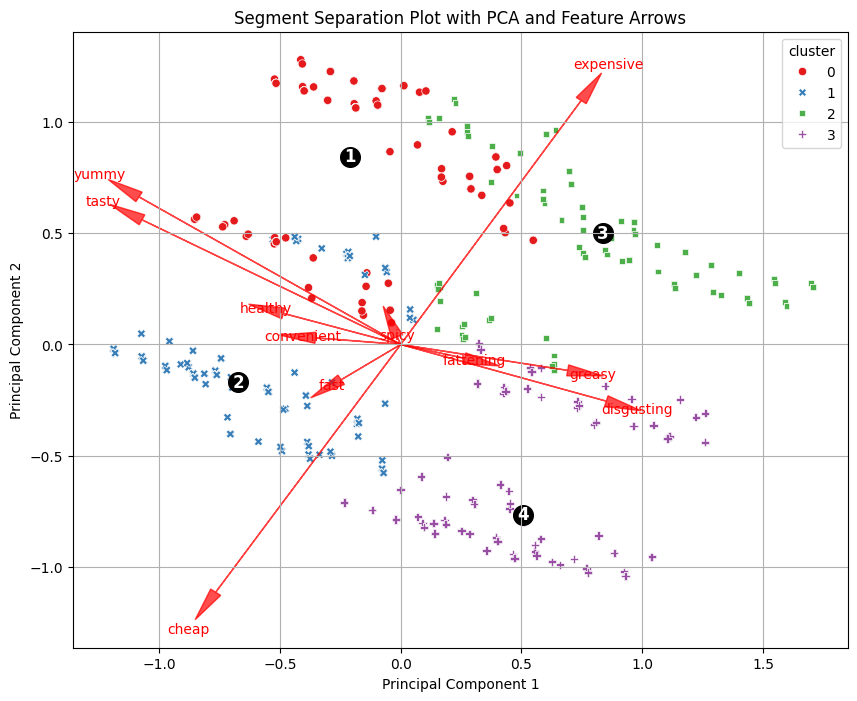

In [378]:
# Clustering into 4 segments using KMeans
X = data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
data['pca1'] = pca_components[:, 0]
data['pca2'] = pca_components[:, 1]
scaling_factor = 3  # Adjust this value to make arrows larger
# Get the loadings (arrows for original features)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)* scaling_factor

# Plot PCA components and color by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='Set1', style='cluster')

# Plot the centers of the clusters
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], s=200, c='black', marker='o')
    plt.text(center[0], center[1], str(i + 1), fontsize=12, color='white', weight='bold',
             ha='center', va='center')

# Add arrows for the original features
features = X.columns
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.7, head_width=0.05,head_length=0.15,)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='red', ha='center', va='center')

# Add labels for the PCA axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.title('Segment Separation Plot with PCA and Feature Arrows')
plt.grid()
plt.show()

In [305]:
print(rotation_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444 -0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515  0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019 -0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359  0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373 -0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642  0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310 -0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265  0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397 -0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051 -0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571 -0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy       0.280519 -0.013041 -0.572403  0.1102

In [64]:
data=pd.concat([numeric_matrix,mcdonalds[['Like','Age','VisitFrequency','Gender']]],axis=1)

In [22]:
# A.7 Step 7: Describing Segments

In [165]:
 # Shaded mosaic plot for cross-tabulation of segment membership and like

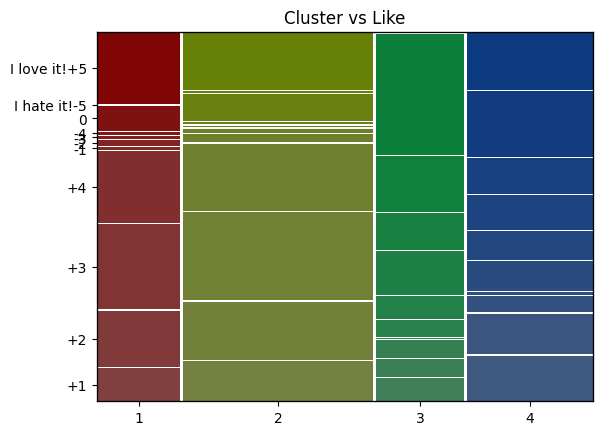

In [163]:
# Assuming you want to cluster the data and use 'Like' column for the mosaic plot
# Let's cluster into 4 segments (like in your example) using KMeans clustering
X = data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
kmeans = KMeans(n_clusters=4)

data['cluster'] = kmeans.fit_predict(X)
data['cluster']=data['cluster']+1
# Prepare data for mosaic plot - Contingency table (clusters vs Like column)
contingency_table = pd.crosstab(data['cluster'], data['Like'])

# Create the mosaic plot
mosaic(contingency_table.stack(), title='Cluster vs Like', labelizer=lambda k: '')
plt.show()

In [166]:
 # Shaded mosaic plot for cross-tabulation of segment membership and gender

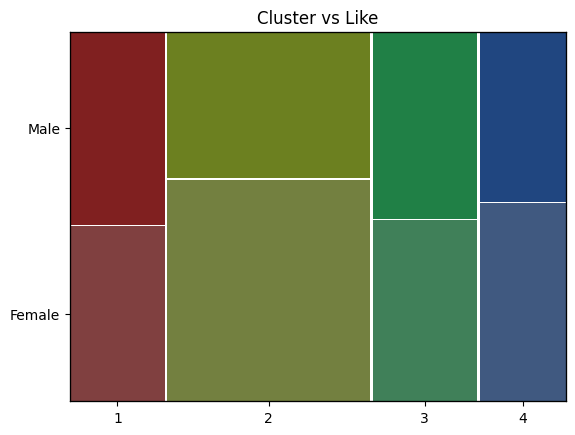

In [164]:
# Assuming you want to cluster the data and use 'GENDER' column for the mosaic plot
# Let's cluster into 4 segments (like in your example) using KMeans clustering
X = data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
kmeans = KMeans(n_clusters=4)

data['cluster'] = kmeans.fit_predict(X)
data['cluster']=data['cluster']+1
# Prepare data for mosaic plot - Contingency table (clusters vs Like column)
contingency_table = pd.crosstab(data['cluster'], data['Gender'])

# Create the mosaic plot
mosaic(contingency_table.stack(), title='Cluster vs Like', labelizer=lambda k: '')
plt.show()

In [225]:
# Parallel box-and-whisker plot

In [219]:
df=data

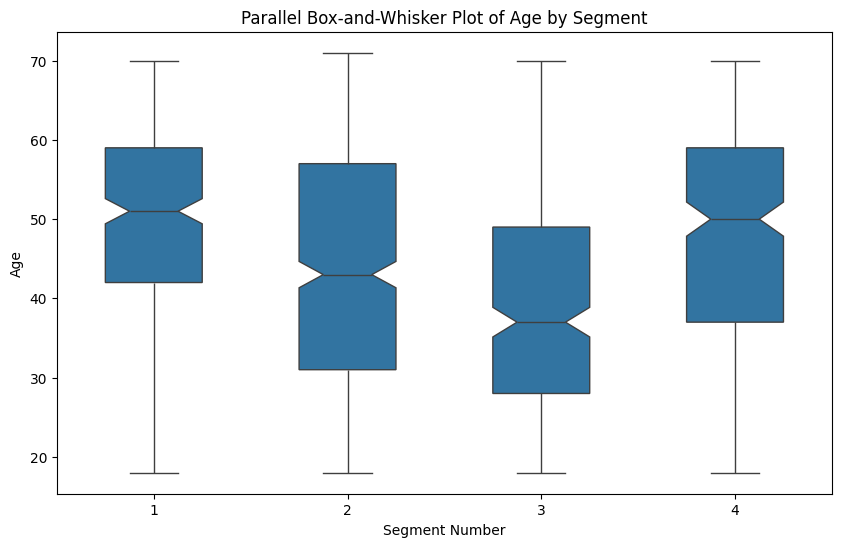

In [224]:
# Create the boxplot
plt.figure(figsize=(10,6))  # Set the figure size

# Use seaborn for a nicer boxplot
sns.boxplot(x='cluster', y='Age', data=df, width=0.5, notch=True)

# Set the labels and title
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Parallel Box-and-Whisker Plot of Age by Segment')

# Display the plot
plt.show()

In [7]:
# Conditional inference tree using segment 3 membership as dependentvariable


In [383]:
MCdonalds=pd.concat([mcdonald,mcdonalds[['Age','VisitFrequency','Gender']],data['cluster']],axis=1)

In [374]:
data=MCdonalds

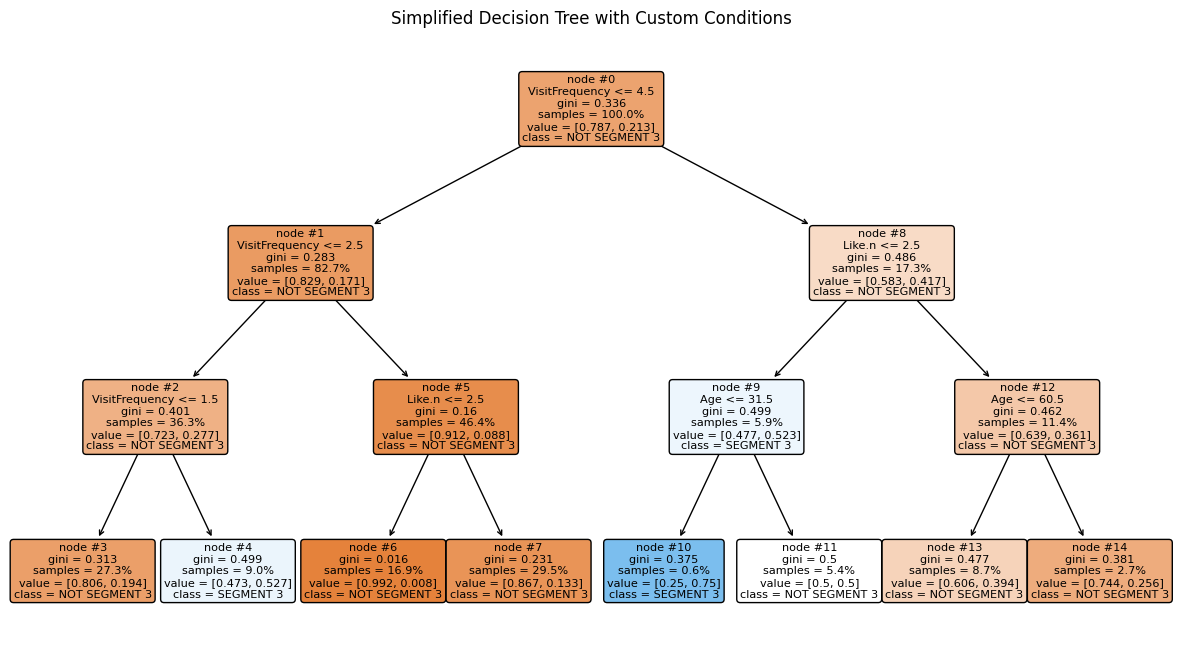

In [389]:
# Encode categorical variables (VisitFrequency)
label_encoder_visit = LabelEncoder()
data['VisitFrequency_enc'] = label_encoder_visit.fit_transform(data['VisitFrequency'])

# Convert the target to a binary variable (Is cluster == 3?)
data['is_cluster_3'] = (data['cluster'] == 3).astype(int)

# Features (X) and Target (y)
X = data[['Like.n', 'Age', 'VisitFrequency_enc']]  # Use features Age, Like.n, VisitFrequency
y = data['is_cluster_3']  # Binary target: 1 if cluster is 3, else 0

# Train the decision tree classifier with max depth to prune the tree
tree_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)  # Limit depth for clean plot
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 8))
tree_plot = plot_tree(tree_model, 
          feature_names=['Like.n', 'Age', 'VisitFrequency'],  # Feature names
          class_names=['NOT SEGMENT 3', 'SEGMENT 3'],  # Labels for binary classification
          filled=True, rounded=True, proportion=True,  # Customize plot
          node_ids=True)  # Show node IDs for annotation
# Display the plot
plt.title("Simplified Decision Tree with Custom Conditions")
plt.show()

In [23]:
# A.8 Step 8: Selecting (the) Target Segment(s)

In [392]:
#mean segment values for VisitFrequency

In [126]:
 n_clusters = 4
# Step 1: Perform KMeans clustering to get centroids and other parameters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(numeric_matrix)
labels = gmm.predict(numeric_matrix)

# Adjust labels to be 1 and 2 instead of 0 and 1
labels += 1

# Append the labels to the original DataFrame
mcdonalds['Cluster'] = labels
mcdonalds['Cluster'].unique()
data['cluster']=mcdonalds['Cluster']

In [127]:
# Convert VisitFrequency to a numeric scale (example mapping)
visit_mapping = {
    'Every day': 1,
    'Once a week': 2,
    'Once a month': 3,
    'Every three months': 4,
    'Once a year': 5
}

# Map VisitFrequency to numeric
data['VisitFrequency_numeric'] = data['VisitFrequency'].map(visit_mapping)
 
# Group by 'cluster' and calculate the mean VisitFrequency for each cluster
visit_means = data.groupby('cluster')['VisitFrequency_numeric'].mean()
# Print the result
visit =visit_means
visit


cluster
1    3.254025
2    4.459770
3    3.550088
4    3.547170
Name: VisitFrequency_numeric, dtype: float64

In [128]:
#mean segment values for Like.n

In [129]:
data['Like.n']= mcdonalds['Like.n'].astype(int)

In [130]:
# Adjust clusters to start from 1
# Group by 'cluster' and calculate the mean of 'Like.n' for each cluster
like_means = data.groupby('cluster')['Like.n'].mean()

# Print the result
like=like_means
like

cluster
1    2.185619
2   -3.648649
3    0.463190
4    1.090909
Name: Like.n, dtype: float64

In [131]:
# segment mean for gender

In [132]:
data['Gender_numeric'] = (data['Gender'] == 'Female').astype(int)
# Group by 'cluster' and calculate the mean of 'Gender_numeric' for each cluster
gender_means = data.groupby('cluster')['Gender_numeric'].mean().reset_index()
gender=gender_means['Gender_numeric']

In [133]:
 gender

0    0.551839
1    0.459459
2    0.558282
3    0.472727
Name: Gender_numeric, dtype: float64